HOTEL BOOKING ANALYSIS

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/Users/darren/Downloads/cvproject/dataset/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [3]:
df.shape

(119390, 32)

In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.isnull().values.any()

np.True_

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df.fillna(0, inplace = True)

In [8]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [9]:
df["meal"].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [10]:
df["children"].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [11]:
df["adults"].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [12]:
df["babies"].unique()

array([ 0,  1,  2, 10,  9])

In [13]:
len(df[df["adults"] == 0])

403

In [14]:
filter = (df["children"] == 0) & (df["adults"] == 0) & (df["babies"] == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [15]:
data = df[~filter]
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [16]:
data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [17]:
resort = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
city = data[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

In [18]:
resort.shape

(28927, 32)

In [19]:
city.shape

(46084, 32)

In [20]:
label = resort["country"].value_counts().index
value = resort["country"].value_counts().values

In [21]:
country_wise = data[data["is_canceled"] == 0]["country"].value_counts().reset_index()
country_wise

,country,count
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [22]:
country_wise.columns = ["country", "no of guests"]
country_wise

,country,no of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [23]:
import folium
import plotly.express as px
from folium.plugins import HeatMap

basemap = folium.Map()

In [24]:
country_wise.dtypes

country         object
no of guests     int64
dtype: object

In [25]:
map_guest = px.choropleth(country_wise,
                          locations = country_wise["country"],
                          color = country_wise["no of guests"],
                          hover_name = country_wise["country"],
                          title = "Home country guest")

map_guest.show()

In [26]:
data2 = data[data["is_canceled"] == 0]
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

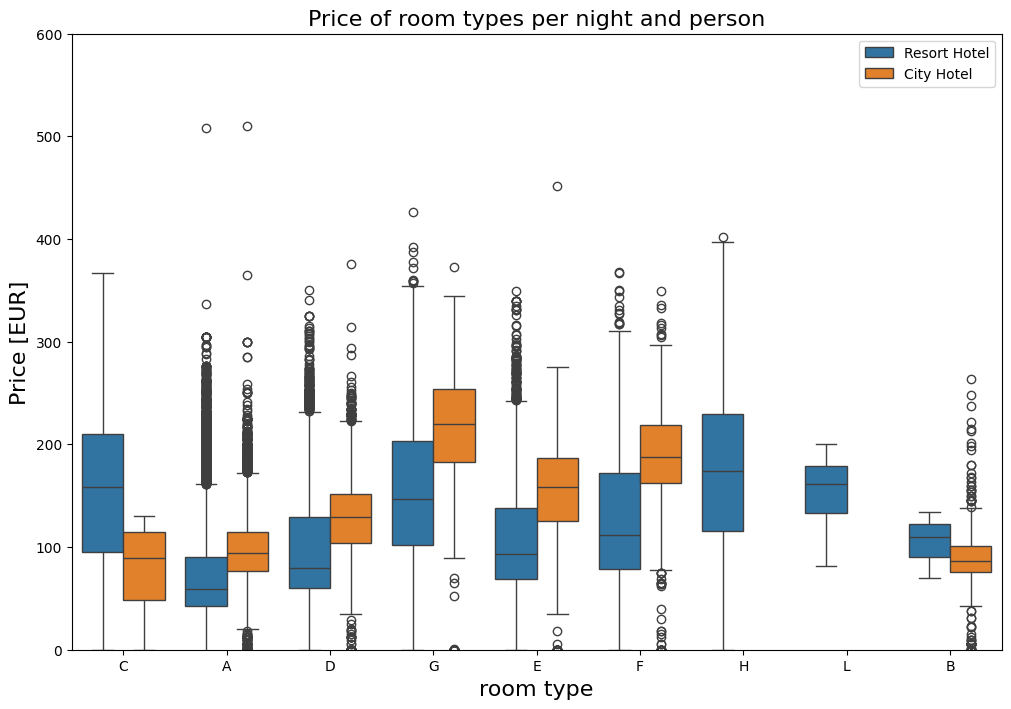

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(x = "reserved_room_type",
            y = "adr",
            hue = "hotel",
            data = data2)
plt.title("Price of room types per night and person", fontsize = 16)
plt.xlabel("room type", fontsize = 16)
plt.ylabel("Price [EUR]", fontsize = 16)
plt.ylim(0,600)
plt.legend(loc = "upper right")
plt.show()

In [30]:
data_resort = resort[resort["is_canceled"] == 0]
data_city = city[city["is_canceled"] == 0]

In [31]:
resort_hotel = data_resort.groupby(["arrival_date_month"])["adr"].mean().reset_index()
resort_hotel.head()

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125


In [32]:
city_hotel = data_city.groupby(["arrival_date_month"])["adr"].mean().reset_index()
city_hotel.head()

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983


In [33]:
final = resort_hotel.merge(city_hotel, on = "arrival_date_month")
final.columns = ["month", "price_for_resort", "price_for_city_hotel"]
final.head()

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983


In [34]:
import sort_dataframeby_monthorweek as sd

In [35]:
final2 = sd.Sort_Dataframeby_Month(df=final, monthcolumnname = "month")
final2.head()

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827


In [36]:
px.line(final2, x = "month", y = ["price_for_resort", "price_for_city_hotel"])

In [37]:
px.line(final, x = "month", y = ["price_for_resort", "price_for_city_hotel"])

In [38]:
data[["hotel", "market_segment", "stays_in_weekend_nights", "stays_in_week_nights"]]

,hotel,market_segment,stays_in_weekend_nights,stays_in_week_nights
0,Resort Hotel,Direct,0,0
1,Resort Hotel,Direct,0,0
2,Resort Hotel,Direct,0,1
3,Resort Hotel,Corporate,0,1
4,Resort Hotel,Online TA,0,2
...,...,...,...,...
119385,City Hotel,Offline TA/TO,2,5
119386,City Hotel,Online TA,2,5
119387,City Hotel,Online TA,2,5
119388,City Hotel,Online TA,2,5


<Axes: xlabel='market_segment', ylabel='stays_in_week_nights'>

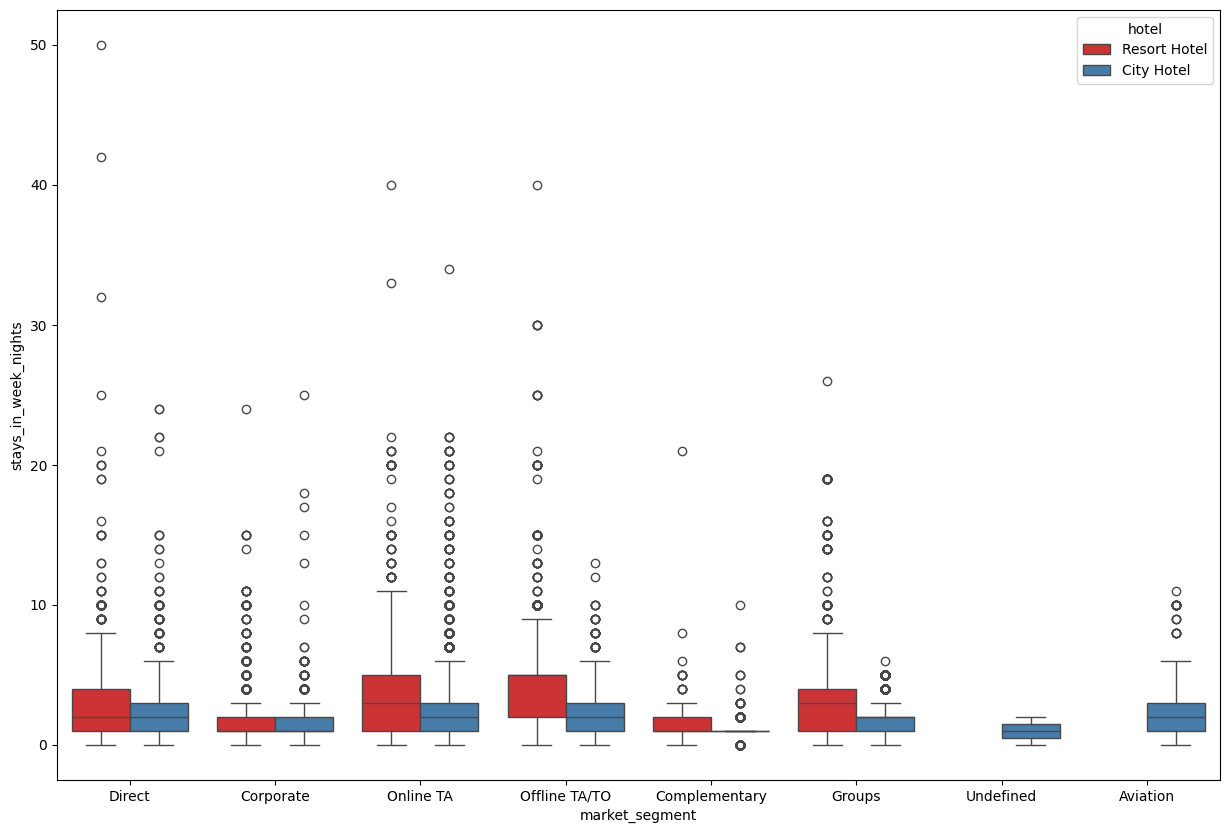

In [39]:
plt.figure(figsize=(15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = data, hue = "hotel", palette = "Set1")

In [40]:
filter = data["is_canceled"] == 0
clean_data = data[filter]
clean_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


/var/folders/9c/8yfvcfnx6lqfgkglv0hjr8rr0000gn/T/ipykernel_61323/3704384294.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/var/folders/9c/8yfvcfnx6lqfgkglv0hjr8rr0000gn/T/ipykernel_61323/3704384294.py:2: FutureWarning:



The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.




<Axes: xlabel='market_segment', ylabel='adr'>

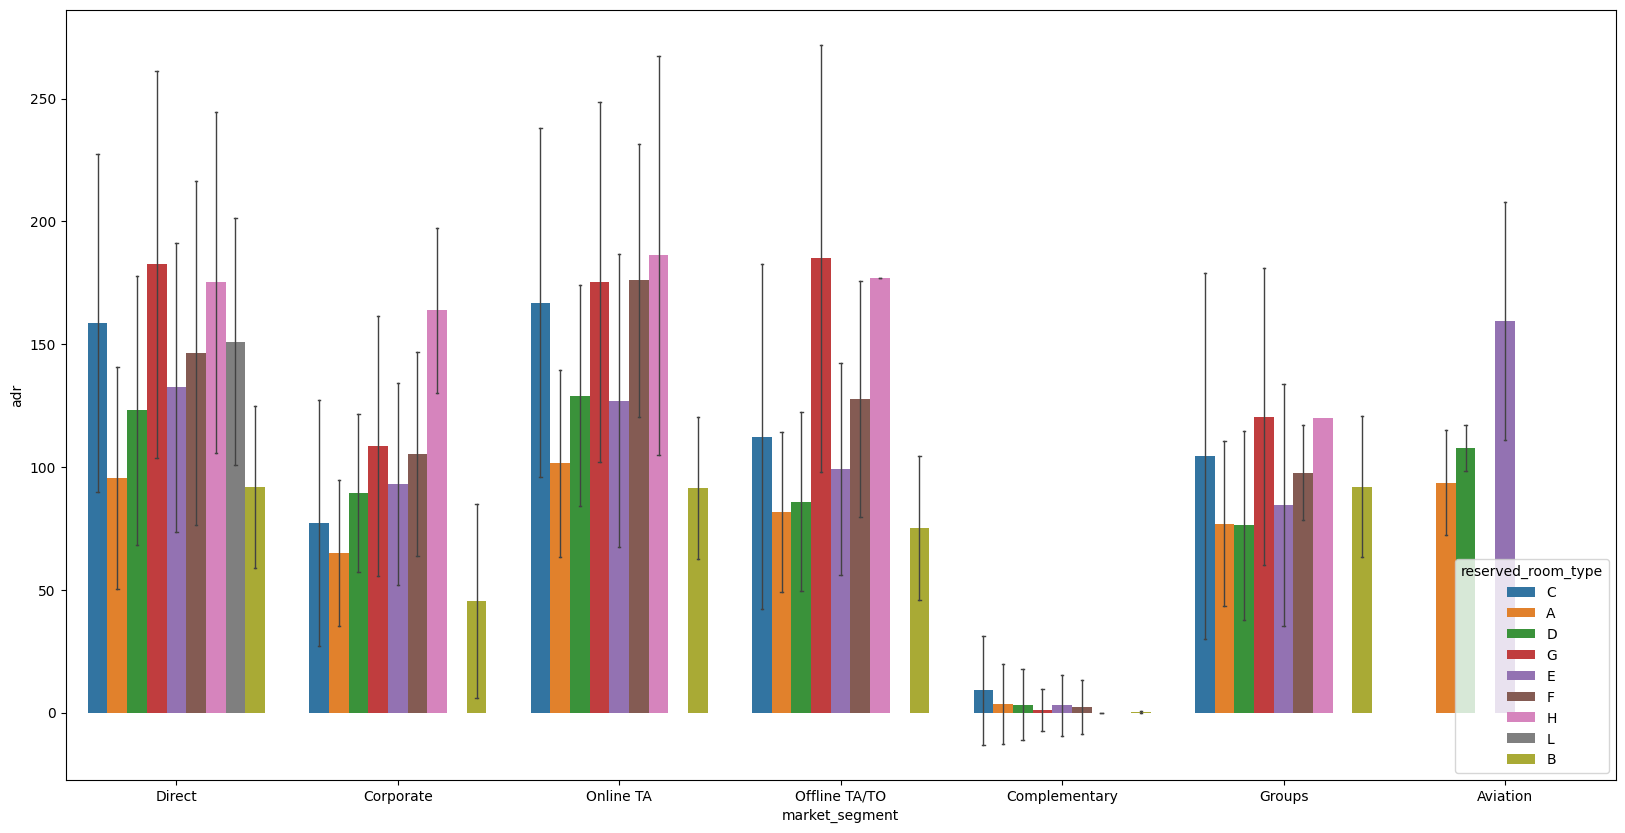

In [41]:
plt.figure(figsize=(20,10))
sns.barplot(x="market_segment",
            y = "adr",
            hue = "reserved_room_type",
            data = clean_data,
            ci = "sd",
            errwidth=1,
            capsize=0.1)

In [42]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [43]:
meal = df.groupby("meal")["meal"].count()
meal

meal
BB           92310
FB             798
HB           14463
SC           10650
Undefined     1169
Name: meal, dtype: int64

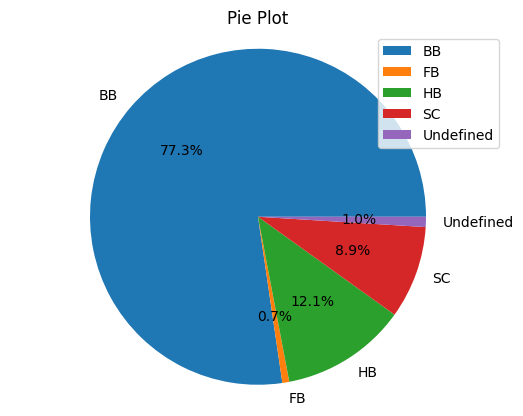

In [44]:
plt.pie(meal.values, labels=meal.index, autopct="%1.1f%%")
plt.title('Pie Plot')
plt.axis('equal')
plt.legend()
plt.show()

In [45]:
px.pie(names = meal.index, values=meal.values, title='Pie Plot')

In [46]:
px.pie(df, names = "meal")

In [47]:
# QUESTION 2

booking = df.groupby(["hotel", "meal"])["meal"].count()
booking.unstack()

meal,BB,FB,HB,SC,Undefined
hotel,,,,,
City Hotel,62305.0,44.0,6417.0,10564.0,NaN
Resort Hotel,30005.0,754.0,8046.0,86.0,1169.0


STACK = DARI PIVOT TABEL JADI GROUPBY

UNSTACK = DARI GROUP BY MENJADI PIVOT TABEL

<Axes: xlabel='total_of_special_requests'>

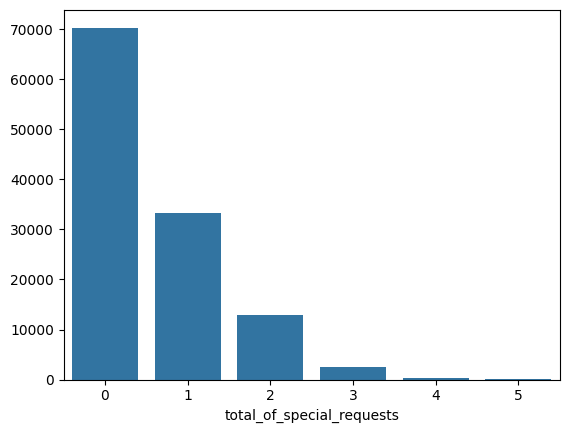

In [48]:
# QUESTION 3

special = df["total_of_special_requests"].value_counts()

sns.barplot(x = special.index, y = special.values)

In [49]:
# QUESTION 4

df["is_canceled"].unique()

array([0, 1])

In [50]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [51]:
insight = df.groupby(["total_of_special_requests", "is_canceled"])["is_canceled"].count()
unstack = insight.unstack()
unstack

is_canceled,0,1
total_of_special_requests,,
0,36762,33556
1,25908,7318
2,10103,2866
3,2051,446
4,304,36
5,38,2


In [52]:
px.bar(insight.unstack())

<Axes: xlabel='total_of_special_requests'>

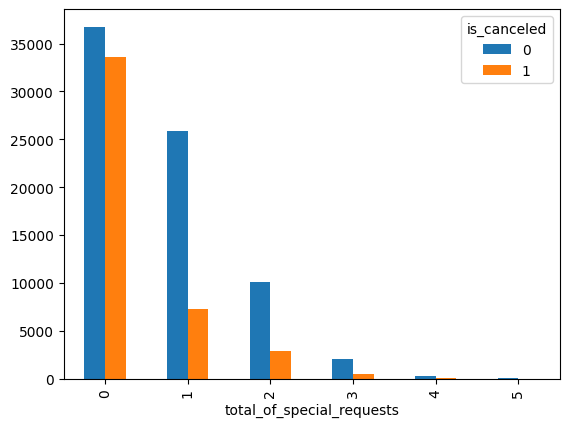

In [53]:
unstack.plot.bar()

In [54]:
# QUESTION 5
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [55]:
resort = df[df["hotel"] == "Resort Hotel"]
city = df[df["hotel"] == "City Hotel"]

In [56]:
month_resort = resort["arrival_date_month"].value_counts().reset_index()
month_city = city["arrival_date_month"].value_counts().reset_index()


In [57]:
merge = month_resort.merge(month_city, on = "arrival_date_month")
merge.columns = ["month", "jumlah tamu resort", "jumlah tamu city hotel"]
merge.head()

,month,jumlah tamu resort,jumlah tamu city hotel
0,August,4894,8983
1,July,4573,8088
2,April,3609,7480
3,May,3559,8232
4,October,3555,7605


In [58]:
# QUESTION 6


import sort_dataframeby_monthorweek as sd

In [59]:
import sort_dataframeby_monthorweek as sd
sort = sd.Sort_Dataframeby_Month(df=merge, monthcolumnname = 'month')
sort.head()

,month,jumlah tamu resort,jumlah tamu city hotel
0,January,2193,3736
1,February,3103,4965
2,March,3336,6458
3,April,3609,7480
4,May,3559,8232


In [60]:
# QUESTION 7

px.line(sort, x = "month", y = ["jumlah tamu resort", "jumlah tamu city hotel"])